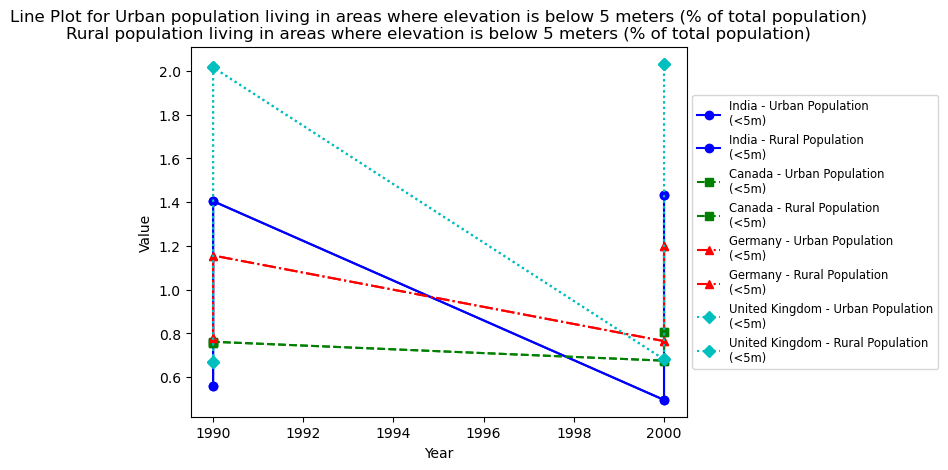

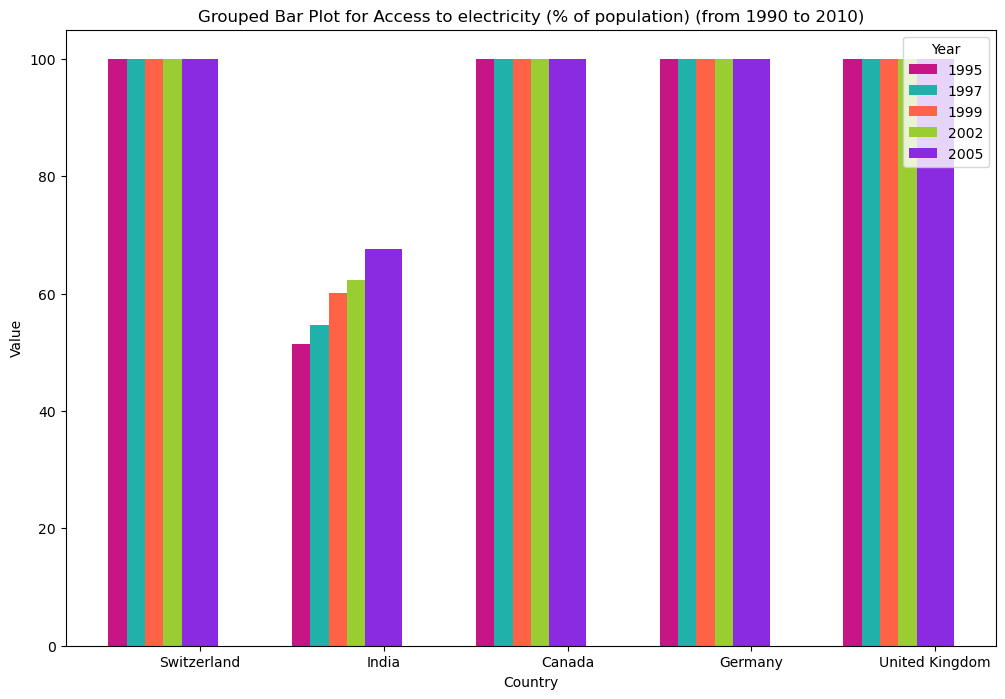

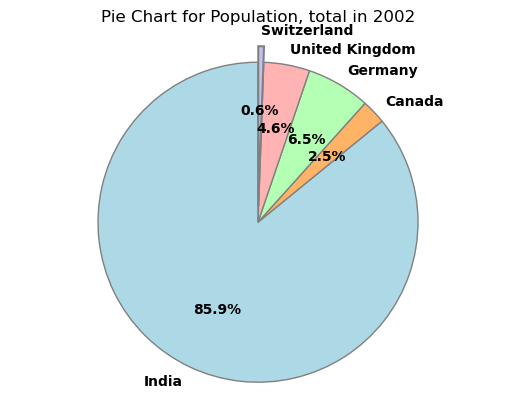

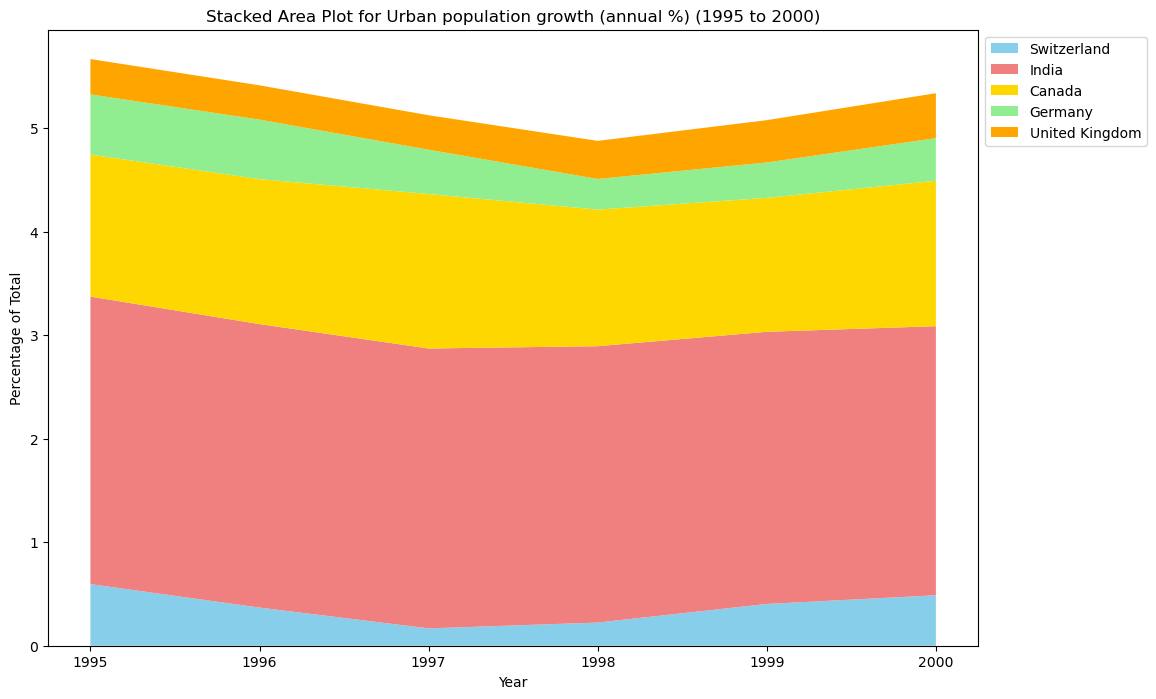

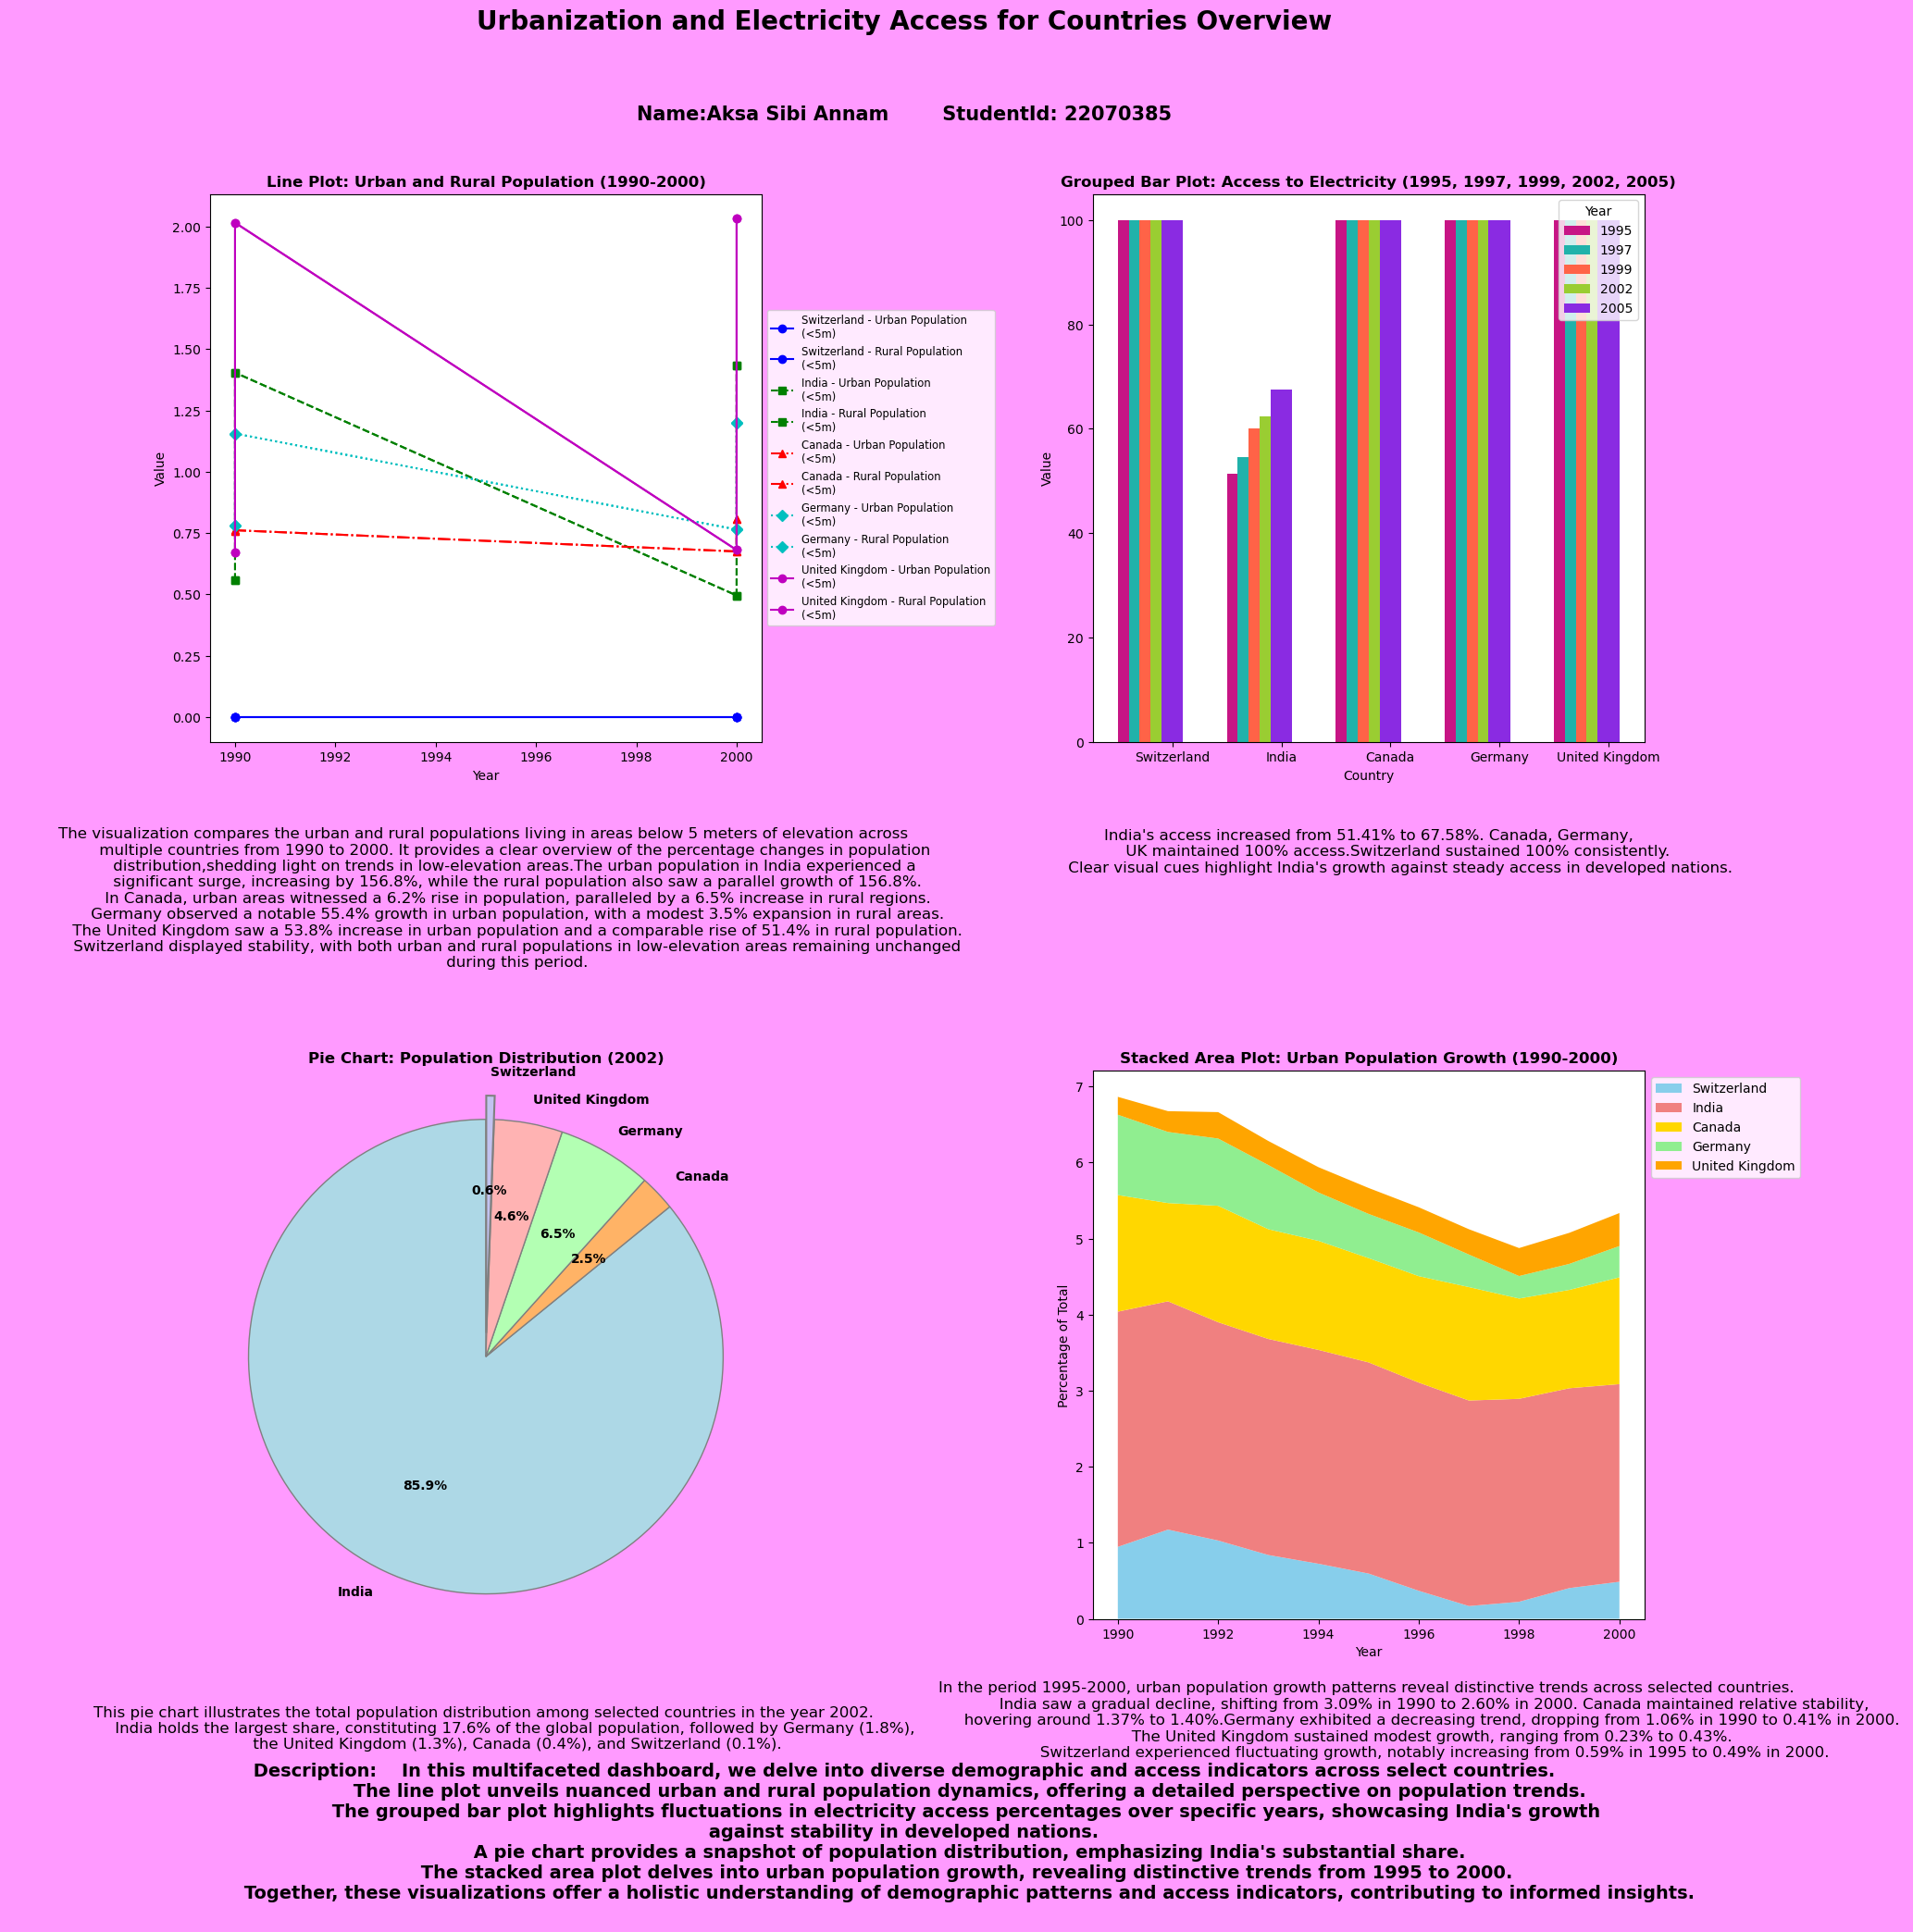

In [2]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec as gsp
from matplotlib.gridspec import GridSpec
import pandas as pd


def read_data(file_path):
    # Read data from CSV file
    with open(file_path, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        # Return the entire data
        return list(csv_reader)


def line_plot(data, indicators_to_plot, start_year, end_year, countries_to_plot, ax=None):
    # If ax is not provided, create a new plot
    if ax is None:
        fig, ax = plt.subplots()

    # Create a dictionary to store data for each country and each indicator
    country_data = {country: {'years': [], 'data': {indicator: [] for indicator in indicators_to_plot}} for country in
                    countries_to_plot}

    # Define line styles, markers, and colors
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D']
    colors = ['b', 'g', 'r', 'c', 'm']

    # Indicator short form mapping
    indicator_short_forms = {
        'Urban population living in areas where elevation is below 5 meters (% of total population)': 'Urban Population\n(<5m)',
        'Rural population living in areas where elevation is below 5 meters (% of total population)': 'Rural Population\n(<5m)'
    }

    # Extract years and data for the chosen indicators within the specified range
    for i, row in enumerate(data):
        if row['Indicator Name'] in indicators_to_plot and start_year <= int(row['Year']) <= end_year:
            for j, country in enumerate(countries_to_plot):
                country_data[country]['years'].append(int(row['Year']))
                # Assuming the column for the country is the same as the country name
                for indicator in indicators_to_plot:
                    country_data[country]['data'][indicator].append(
                        float(row[country]))

    # Plot the data for each country and each indicator with different styles
    for j, country in enumerate(countries_to_plot):
        for indicator in indicators_to_plot:
            # Get short form or use the full name
            short_form = indicator_short_forms.get(indicator, indicator)
            ax.plot(country_data[country]['years'], country_data[country]['data'][indicator],
                    label=f'{country} - {short_form}', linestyle=line_styles[j % len(line_styles)],
                    marker=markers[j % len(markers)], color=colors[j % len(colors)])

    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    # Add newline characters for readability
    ax.set_title('Line Plot for {}'.format('\n'.join(indicators_to_plot)))

    # Adjust legend settings
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

    # If ax was not provided, show the plot
    if not ax:
        plt.show()

    # Return the axis for potential further customization
    return ax


def bar_plot(data, indicator_to_plot, selected_years, countries_to_plot, ax=None):
    """
    Generate a grouped bar plot to visualize the given indicator's values across selected years for multiple countries.

    Parameters:
    - data (list): List of dictionaries containing indicator data for various countries and years.
    - indicator_to_plot (str): The indicator to be visualized.
    - selected_years (list): List of years to include in the plot.
    - countries_to_plot (list): List of countries to include in the plot.
    - ax (matplotlib.axes._axes.Axes): Axes to use for plotting. If None, a new plot is created.

    Returns:
    - matplotlib.axes._axes.Axes: The Axes containing the generated plot.
    """

    # If ax is not provided, create a new plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))

    # Create a dictionary to store data for each country and year
    country_year_data = {country: {year: [] for year in selected_years} for country in countries_to_plot}

    # Extract data for the chosen indicator and years
    for row in data:
        if row['Indicator Name'] == indicator_to_plot and int(row['Year']) in selected_years:
            year = int(row['Year'])
            for country in countries_to_plot:
                value = float(row[country]) if row[country] != '' else 0.0
                country_year_data[country][year].append(value)

    # Plot the data as a grouped bar chart with new light colors
    bar_width = 0.2  # Adjust the width of the bars

    # Define the positions for each group of bars
    positions = np.arange(len(countries_to_plot)) + 0.5 * (len(selected_years) - 1) * bar_width

    # Define new light colors
    light_colors = ['#C71585', '#20B2AA', '#FF6347', '#9ACD32', '#8A2BE2']
    
    

    for i, year in enumerate(selected_years):
        # Adjust the positions for each year
        year_positions = positions - 0.5 * (len(selected_years) - 1 - i) * bar_width
        values = np.array([country_year_data[country][year] for country in countries_to_plot])

        # Check if values is not empty before trying to access it
        if values.size > 0:
            ax.bar(year_positions, np.sum(values, axis=1), width=bar_width, label=str(year), color=light_colors[i])

    # Add labels and title
    ax.set_xlabel('Country')
    ax.set_ylabel('Value')
    ax.set_title('Grouped Bar Plot for {} (from 1990 to 2010)'.format(indicator_to_plot))

    # Set x-axis ticks and labels
    ax.set_xticks(positions)
    ax.set_xticklabels(countries_to_plot)

    # Add legend
    ax.legend(title='Year')

    # If ax was not provided, show the plot
    if not ax:
        plt.show()

    # Return the axis for potential further customization
    return ax


def pie_visualization(data, indicator_to_plot, year, ax=None, explode=None):
    # If ax is not provided, create a new plot
    if ax is None:
        fig, ax = plt.subplots()

    # Create a dictionary to store data for each country
    country_data = {}

    # Extract data for the chosen indicator and year
    for row in data:
        if row['Indicator Name'] == indicator_to_plot and int(row['Year']) == year:
            for country in row.keys():
                if country != 'Year' and country != 'Indicator Name' and row[country] != '':
                    country_data[country] = float(row[country])

    lighter_colors = ['#add8e6', '#ffb366', '#b3ffb3', '#ffb3b3', '#c2c2f0']

    # Extract values and labels from the dictionary
    labels = list(country_data.keys())
    values = list(country_data.values())

    # Find the index of the smallest value
    min_index = values.index(min(values))

    # Explode slices if specified, with emphasis on the smallest wedge
    explode = [
        0.1 if i == min_index and explode is None else 0 for i in range(len(labels))]

    # Plot the data as a pie chart with additional styles
    wedges, texts, autotexts = ax.pie(values, labels=labels, colors=lighter_colors, autopct='%1.1f%%', startangle=90,
                                      explode=explode, textprops={'fontsize': 10, 'fontweight': 'bold'})

    # Add a shadow effect to create a 3D appearance
    for i, wedge in enumerate(wedges):
        if i == min_index:
            wedge.set_edgecolor('gray')
            wedge.set_linewidth(1.5)  # Increase the linewidth for emphasis
        else:
            wedge.set_edgecolor('gray')
            wedge.set_linewidth(1)

    # Equal aspect ratio ensures that the pie chart is circular
    ax.axis('equal')

    # Add title
    ax.set_title('Pie Chart for {} in {}'.format(
        indicator_to_plot, year))

    # If ax was not provided, show the plot
    if not ax:
        plt.show()

    # Return the axis for potential further customization
    return ax


def plot_stacked_area(data, indicator_to_plot, start_year, end_year, countries_to_plot, ax=None):
    # If ax is not provided, create a new plot

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))

    # Filter data for the chosen indicator and years
    filtered_data = [row for row in data if row['Indicator Name'] ==
                     indicator_to_plot and start_year <= int(row['Year']) <= end_year]

    # Create a dictionary to store data for each source
    sources_data = {source: {'years': [], 'data': []} for source in data[0].keys(
    ) if source not in ['Year', 'Indicator Name'] and source in countries_to_plot}

    # Extract years and data for each source
    for row in filtered_data:
        for source in sources_data.keys():
            sources_data[source]['years'].append(int(row['Year']))
            value = float(row[source])
            sources_data[source]['data'].append(value)


    # Create a list of years
    years = list(set(year for source_data in sources_data.values()
                 for year in source_data['years']))

    # Define custom colors and styles
    custom_colors = ['skyblue', 'lightcoral', 'gold', 'lightgreen', 'orange']
    custom_styles = ['-', '--', '-.', ':', '-']

    # Plot the data as a stacked area plot with custom colors and styles
    ax.stackplot(years,
                 *[sources_data[c]['data'] for c in countries_to_plot],
                 labels=countries_to_plot,
                 colors=custom_colors,
                 linestyles=custom_styles)

    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of Total')
    ax.set_title(
        f'Stacked Area Plot for {indicator_to_plot} ({start_year} to {end_year})')

    # Add legend
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # If ax was not provided, show the plot
    if not ax:
        plt.show()

    # Return the axis for potential further customization
    return ax


def dashboard(data, countries):

    plot_line_indicator = [
        'Urban population living in areas where elevation is below 5 meters (% of total population)',
        'Rural population living in areas where elevation is below 5 meters (% of total population)'
    ]
    indicator_plot_area = 'Urban population growth (annual %)'
    bar_indicator = 'Access to electricity (% of population)'
    years_bar = [1995, 1997, 1999, 2002, 2005]

    # Create a 2x2 grid for subplots
    fig = plt.figure(figsize=(20, 20), facecolor='#ff9aff')
    fig.text(0.5, 0.92, "Name:Aksa Sibi Annam        StudentId: 22070385",
             ha="center", fontweight='bold', fontsize=15)

    gs = GridSpec(2, 2, hspace=0.6, wspace=0.6)

    # First Plot (Line Plot)
    ax1 = fig.add_subplot(gs[0, 0])
    line_plot(data, plot_line_indicator, 1990, 2000, countries, ax=ax1)
    ax1.set_title('Line Plot: Urban and Rural Population (1990-2000)',fontweight='bold')
    ax1.text(0.5, -0.3,"""The visualization compares the urban and rural populations living in areas below 5 meters of elevation across 
             multiple countries from 1990 to 2000. It provides a clear overview of the percentage changes in population 
             distribution,shedding light on trends in low-elevation areas.The urban population in India experienced a 
             significant surge, increasing by 156.8%, while the rural population also saw a parallel growth of 156.8%.
             In Canada, urban areas witnessed a 6.2% rise in population, paralleled by a 6.5% increase in rural regions.
             Germany observed a notable 55.4% growth in urban population, with a modest 3.5% expansion in rural areas.
             The United Kingdom saw a 53.8% increase in urban population and a comparable rise of 51.4% in rural population.
             Switzerland displayed stability, with both urban and rural populations in low-elevation areas remaining unchanged
             during this period.
             """,
             ha='center', va='center', transform=ax1.transAxes, fontsize=12, color='black')
    

    # Second Plot (Grouped Bar Plot)
    ax2 = fig.add_subplot(gs[0, 1])
    bar_plot(data, bar_indicator, years_bar, countries, ax=ax2)
    ax2.set_title(
        'Grouped Bar Plot: Access to Electricity (1995, 1997, 1999, 2002, 2005)',fontweight='bold')
    ax2.text(0.5, -0.2, """India's access increased from 51.41% to 67.58%. Canada, Germany,
             UK maintained 100% access.Switzerland sustained 100% consistently. 
             Clear visual cues highlight India's growth against steady access in developed nations.""",
             ha='center', va='center', transform=ax2.transAxes, fontsize=12, color='black')

    # Third Plot (Pie Chart)
    ax3 = fig.add_subplot(gs[1, 0])
    pie_visualization(data, 'Population, total', 2002, ax=ax3)
    ax3.set_title('Pie Chart: Population Distribution (2002)',fontweight='bold')
    ax3.text(0.5, -0.2, """This pie chart illustrates the total population distribution among selected countries in the year 2002. 
             India holds the largest share, constituting 17.6% of the global population, followed by Germany (1.8%), 
             the United Kingdom (1.3%), Canada (0.4%), and Switzerland (0.1%).""",
             ha='center', va='center', transform=ax3.transAxes, fontsize=12, color='black')

    # Fourth Plot (Stacked Area Plot)
    ax4 = fig.add_subplot(gs[1, 1])
    plot_stacked_area(data, indicator_plot_area, 1990, 2000, countries, ax=ax4)
    ax4.set_title('Stacked Area Plot: Urban Population Growth (1990-2000)',fontweight='bold')
    ax4.text(0.5, -0.2, """In the period 1995-2000, urban population growth patterns reveal distinctive trends across selected countries. 
                           India saw a gradual decline, shifting from 3.09% in 1990 to 2.60% in 2000. Canada maintained relative stability,
                           hovering around 1.37% to 1.40%.Germany exhibited a decreasing trend, dropping from 1.06% in 1990 to 0.41% in 2000. 
                           The United Kingdom sustained modest growth, ranging from 0.23% to 0.43%. 
                           Switzerland experienced fluctuating growth, notably increasing from 0.59% in 1995 to 0.49% in 2000.
             """,
             ha='center', va='center', transform=ax4.transAxes, fontsize=12, color='black')

    # Conclusion Text
    description = """\n \n Description:    In this multifaceted dashboard, we delve into diverse demographic and access indicators across select countries. 
                     The line plot unveils nuanced urban and rural population dynamics, offering a detailed perspective on population trends.
                     The grouped bar plot highlights fluctuations in electricity access percentages over specific years, showcasing India's growth \n against stability in developed nations. 
                     A pie chart provides a snapshot of population distribution, emphasizing India's substantial share.
                     The stacked area plot delves into urban population growth, revealing distinctive trends from 1995 to 2000. 
                     Together, these visualizations offer a holistic understanding of demographic patterns and access indicators, contributing to informed insights.
    """
    fig.text(0.5, 0.0, description, ha='center',
             fontweight='bold', fontsize=14, va='center')

    fig.suptitle('Urbanization and Electricity Access for Countries Overview',
                 fontweight='bold', fontsize=20)

    # Adjust layout for better spacing
    #plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("22070385.png", dpi=300)

    # Show the dashboard
    plt.show()


def main():
    file_path = r"populationdetails.csv"
    plot_line_indicator = [
        'Urban population living in areas where elevation is below 5 meters (% of total population)',
        'Rural population living in areas where elevation is below 5 meters (% of total population)']
    start_year = 1995
    end_year = 2000
    countries = ['Switzerland','India', 'Canada', 'Germany', 'United Kingdom']
    bar_indicator = 'Access to electricity (% of population)'
    years_bar = [1995, 1997, 1999, 2002, 2005]
    indicator_plot_area = 'Urban population growth (annual %)'

    # Read data from CSV file
    data = read_data(file_path)
    

    # Create individual plots
    line_plot(data, plot_line_indicator, 1990, 2000, [
              'India', 'Canada', 'Germany', 'United Kingdom'])
    bar_plot(data, bar_indicator, years_bar, countries)
    pie_visualization(data, 'Population, total', 2002)
    plot_stacked_area(data, indicator_plot_area,
                      start_year, end_year, countries)
    dashboard(data, countries)

if __name__ == '__main__':
    main()
